In [22]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV, RFE
from sklearn.datasets import make_classification

# 분류를 위한 피쳐 개수 25, 데이터 1000 임의의 데이터
X, y = make_classification(n_samples = 1000, n_features=25,n_informative=3,
                         n_redundant=2,n_repeated=0,n_classes=8, 
                        n_clusters_per_class=1, random_state=0)

svc = SVC(kernel="linear")
rfecv = RFECV(estimator=svc, step=1, cv = StratifiedKFold(2), # step은 1개씩 줄여가며 
             scoring='accuracy',verbose=2)
rfecv.fit(X,y)
print(rfecv.n_features_)

Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.


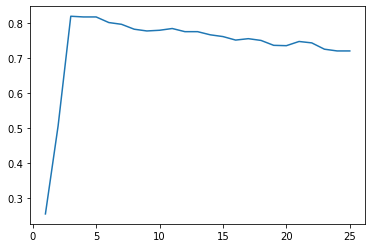

In [23]:
plt.figure()
plt.plot(range(1,len(rfecv.grid_scores_)+1),rfecv.grid_scores_)
plt.show()

In [24]:
X, y = make_classification(n_samples = 10000, n_features=25,n_informative=3,
                         n_redundant=2,n_repeated=0,n_classes=8, 
                        n_clusters_per_class=1, random_state=0)

Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.


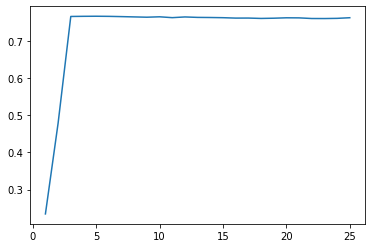

In [25]:
svc = SVC(kernel="linear")
rfecv = RFECV(estimator=svc, step=1, cv = StratifiedKFold(2), # step은 1개씩 줄여가며 
             scoring='accuracy',verbose=2)
rfecv.fit(X,y)
print(rfecv.n_features_)
plt.figure()
plt.plot(range(1,len(rfecv.grid_scores_)+1),rfecv.grid_scores_)
plt.show()

In [ ]:
## selectfrom model

In [28]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X,y= diabetes.data,diabetes.target
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

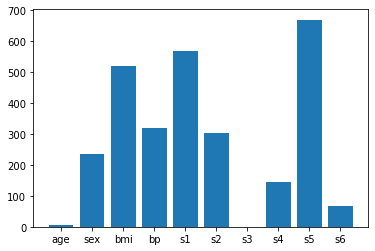

In [30]:
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.linear_model import LassoCV
lasso = LassoCV().fit(X,y)
importance = np.abs(lasso.coef_)
feature_names = np.array(diabetes.feature_names)
plt.bar(height=importance, x=feature_names)
plt.show()

In [34]:
lasso.feature_importances_

AttributeError: 'LassoCV' object has no attribute 'feature_importances_'

In [33]:
from sklearn.feature_selection import SelectFromModel
from  time import time
threshold = np.sort(importance)[-3]+0.01
print(threshold)
sfm = SelectFromModel(lasso, threshold='0.5 * median').fit(X,y)
print(feature_names[sfm.get_support()])

521.7485426067491
['sex' 'bmi' 'bp' 's1' 's2' 's4' 's5']


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
breast_cancer = datasets.load_breast_cancer()
data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
sy = pd.Series(breast_cancer.target, dtype='category')
data['class'] = sy 
# x(독립변수) y(종속 변수) 분리
x = data.loc[:, 'mean radius':'worst fractal dimension']
y = data['class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

x2 = sm.add_constant(x)
model = sm.OLS(y, x2)
result = model.fit()
print('-----------',result.summary())

y_pred = log_reg.predict(x_test)
print('--------------',y_pred)
print(list(y_test))

print('정확도 :', metrics.accuracy_score(y_test, y_pred))

426
143
426
143
-----------                             OLS Regression Results                            
Dep. Variable:                  class   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     61.53
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          6.05e-153
Time:                        22:40:18   Log-Likelihood:                 29.650
No. Observations:                 569   AIC:                             2.699
Df Residuals:                     538   BIC:                             137.4
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
